This will be the notebook where I go down a statistical rabbit hole exploring what's going on with the data and how it affects the Sale Price.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('train_added_cleaned.csv')

In [36]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements.
    
    Args:
      data: an array of values to compute the ECDF for.
      
    Returns:
      Two arrays: x values for the ECDF and y values for the ECDF.
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

Let's start by seeing whether the sale price is normally distributed. We have already noticed there is a skew to the right. The two graphs below will show evidence that it's not exactly normal.

array([ 80000.  , 129975.  , 163000.  , 214000.  , 384510.75])

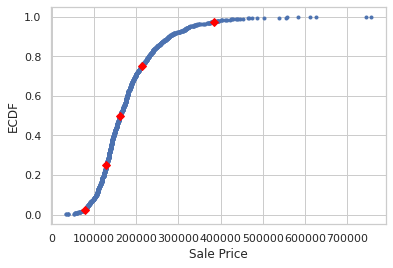

In [37]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles = np.percentile(df['SalePrice'], percentiles)
display(ptiles)

x, y = ecdf(df['SalePrice'])
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(ptiles, percentiles/100, marker='D', color='red', linestyle='none')
plt.xlabel('Sale Price')
plt.ylabel('ECDF')

plt.show()

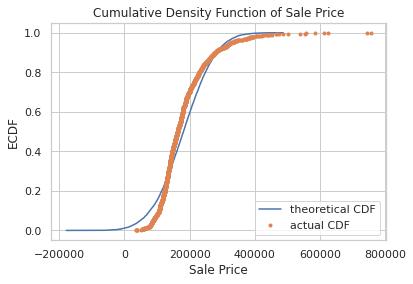

In [38]:
mu = df['SalePrice'].mean()
sigma = df['SalePrice'].std()
samples = np.random.normal(mu, sigma, size=10000)

theoretical_x, theoretical_y = ecdf(samples)
x, y = ecdf(df['SalePrice'])

plt.plot(theoretical_x, theoretical_y, label='theoretical CDF')
plt.plot(x, y, marker='.', linestyle='none', label='actual CDF')
plt.xlabel('Sale Price')
plt.ylabel('ECDF')
plt.title('Cumulative Density Function of Sale Price')
plt.legend(loc='lower right')
plt.show()

Slope is 67.0875522887501
Intercept is -23026.892983277085


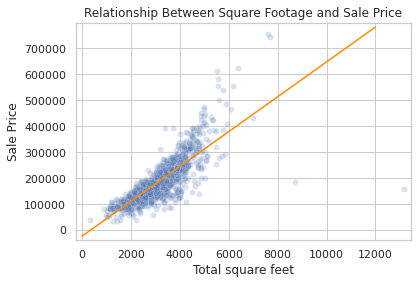

In [39]:
sns.set_style('whitegrid')

sns.scatterplot(x='TotalSF', y='SalePrice', data=df, alpha=0.2)
plt.margins(0.02)
plt.xlabel('Total square feet')
plt.ylabel('Sale Price')
plt.title('Relationship Between Square Footage and Sale Price')

a, b = np.polyfit(df['TotalSF'], df['SalePrice'], 1)
print(f"Slope is {a}")
print(f"Intercept is {b}")

x = np.array([0, 12000])
y = a * x + b

plt.plot(x, y, color='darkorange')

plt.show()

I find myself wondering how much those outliers are affecting the line of best fit, and questioning my decision to leave them in. I'm going to plot this with outliers removed, and run my regressions below for data with and without outliers.

Slope is 74.74389456936635
Intercept is -45481.30686817868


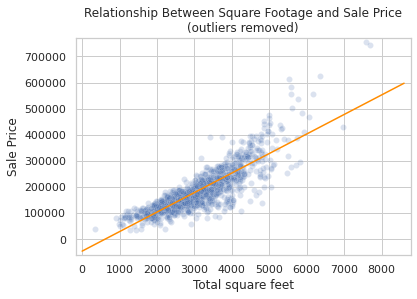

In [40]:
df_outliers_removed = df[df['TotalSF']<8600]

sns.set_style('whitegrid')

sns.scatterplot(x='TotalSF', y='SalePrice', data=df_outliers_removed, alpha=0.2)
plt.margins(0.02)
plt.xlabel('Total square feet')
plt.ylabel('Sale Price')
plt.title('Relationship Between Square Footage and Sale Price\n(outliers removed)')

a, b = np.polyfit(df_outliers_removed['TotalSF'], df_outliers_removed['SalePrice'], 1)
print(f"Slope is {a}")
print(f"Intercept is {b}")

x = np.array([0, 8600])
y = a * x + b

plt.plot(x, y, color='darkorange')

plt.show()

That actually changed the slope and intercept a good deal.

Slope is 45435.802593099426
Intercept is -96206.0795147603


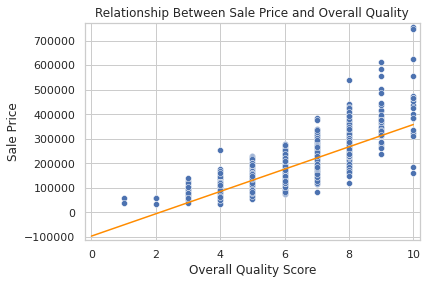

In [41]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.margins(0.02)
plt.xlabel('Overall Quality Score')
plt.ylabel('Sale Price')
plt.title('Relationship Between Sale Price and Overall Quality')

a, b = np.polyfit(df['OverallQual'], df['SalePrice'], 1)
print(f"Slope is {a}")
print(f"Intercept is {b}")

x = np.array([0, 10])
y = a * x + b

plt.plot(x, y, color='darkorange')

plt.show()

In [42]:
df[['SalePrice', 'TotalSF', 'LotArea', 'BedroomAbvGr', 'YearBuilt', 'OverallCond', 'OverallQual']].corr(method='pearson')

,SalePrice,TotalSF,LotArea,BedroomAbvGr,YearBuilt,OverallCond,OverallQual
SalePrice,1.000000,0.809561,0.263843,0.168213,0.522897,-0.077856,0.790982
TotalSF,0.809561,1.000000,0.303583,0.318015,0.404367,-0.157065,0.698060
LotArea,0.263843,0.303583,1.000000,0.119690,0.014228,-0.005636,0.105806
BedroomAbvGr,0.168213,0.318015,0.119690,1.000000,-0.070651,0.012980,0.101676
YearBuilt,0.522897,0.404367,0.014228,-0.070651,1.000000,-0.375983,0.572323
OverallCond,-0.077856,-0.157065,-0.005636,0.012980,-0.375983,1.000000,-0.091932
OverallQual,0.790982,0.698060,0.105806,0.101676,0.572323,-0.091932,1.000000


"TotalSF" and "OverallQual" seem to be having the greatest effects on sale price, but let's throw all of these into a regression to see what happens.

Also, we'll check for multicollinearity.

In [43]:
X_data = df[['TotalSF', 'LotArea', 'BedroomAbvGr', 'YearBuilt', 'OverallCond', 'OverallQual']]
display(X_data.corr())

,TotalSF,LotArea,BedroomAbvGr,YearBuilt,OverallCond,OverallQual
TotalSF,1.000000,0.303583,0.318015,0.404367,-0.157065,0.698060
LotArea,0.303583,1.000000,0.119690,0.014228,-0.005636,0.105806
BedroomAbvGr,0.318015,0.119690,1.000000,-0.070651,0.012980,0.101676
YearBuilt,0.404367,0.014228,-0.070651,1.000000,-0.375983,0.572323
OverallCond,-0.157065,-0.005636,0.012980,-0.375983,1.000000,-0.091932
OverallQual,0.698060,0.105806,0.101676,0.572323,-0.091932,1.000000


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_data, df['SalePrice'])
y_pred = reg.predict(X_data)
r2 = reg.score(X_data, df['SalePrice'])
rmse = np.sqrt(mean_squared_error(df['SalePrice'], y_pred))
print(f"R^2 value is: {r2} and root mean squared error is {rmse}")
print(f"Intercept: {reg.intercept_}")
print(f"Coefficients: 'TotalSF', 'LotArea', 'BedroomAbvGr', 'YearBuilt', 'OverallCond', 'OverallQual'\n{reg.coef_}")

R^2 value is: 0.7741869618950294 and root mean squared error is 37737.97942581816
Intercept: -849830.4407847369
Coefficients: 'TotalSF', 'LotArea', 'BedroomAbvGr', 'YearBuilt', 'OverallCond', 'OverallQual'
[ 4.10447801e+01  6.08195860e-01 -2.59615796e+03  3.77265302e+02
  6.30222053e+03  2.10174053e+04]


In [45]:
import statsmodels.api as sm

y = df['SalePrice']
X = X_data
X = sm.add_constant(X)
linear = sm.OLS(endog=y, exog=X)
results = linear.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     830.3
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:51:15   Log-Likelihood:                -17458.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1453   BIC:                         3.497e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.498e+05   8.69e+04     -9.776      0.000   -1.02e+06   -6.79e+05
TotalSF         41.0448      1.636     25.095      0.000      37.836      44.253
LotArea          0.6082      0.106      5.755      0.000       0.401       0.815
BedroomAbvGr -2596.1580   1320.770     -1.966      0.050   -5186.977      -5.339
YearBuilt      377.2653     44.187      8.538      0.000     290.588     463.943
OverallCond   6302.2205    983.139      6.410      0.000    4373.697    8230.744
OverallQual   2.102e+04   1153.436     18.222      0.000    1.88e+04    2.33e+04
==============================================================================
Omnibus:                      706.304   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126807.781
Skew:                          -1.137   Prob(JB):                         0.00
Kurtosis:                      48.600   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An R-squared of 0.77 isn't great, but it isn't bad. It looks like the number of bedrooms isn't particularly significant. 

I also want to take a look at this without those outliers.

In [46]:
X_data_outliers_removed = df_outliers_removed[['TotalSF', 'LotArea', 'BedroomAbvGr', 'YearBuilt', 'OverallCond', 'OverallQual']]
display(X_data_outliers_removed.corr())

,TotalSF,LotArea,BedroomAbvGr,YearBuilt,OverallCond,OverallQual
TotalSF,1.000000,0.270044,0.333372,0.412421,-0.159477,0.706290
LotArea,0.270044,1.000000,0.120311,0.007462,-0.002723,0.091392
BedroomAbvGr,0.333372,0.120311,1.000000,-0.070992,0.013099,0.101601
YearBuilt,0.412421,0.007462,-0.070992,1.000000,-0.375572,0.571368
OverallCond,-0.159477,-0.002723,0.013099,-0.375572,1.000000,-0.090442
OverallQual,0.706290,0.091392,0.101601,0.571368,-0.090442,1.000000


Removing the outliers increased the extent to which overall quality is correlated with total square feet.

In [47]:
y = df_outliers_removed['SalePrice']
X = X_data_outliers_removed
X = sm.add_constant(X)
linear = sm.OLS(endog=y, exog=X)
results = linear.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:51:15   Log-Likelihood:                -17232.
No. Observations:                1458   AIC:                         3.448e+04
Df Residuals:                    1451   BIC:                         3.451e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.086e+05   7.57e+04    -10.681      0.000   -9.57e+05    -6.6e+05
TotalSF         52.4386      1.520     34.504      0.000      49.457      55.420
LotArea          0.6892      0.092      7.485      0.000       0.509       0.870
BedroomAbvGr -6291.5991   1162.647     -5.411      0.000   -8572.248   -4010.950
YearBuilt      353.3269     38.487      9.180      0.000     277.831     428.822
OverallCond   6898.8155    856.428      8.055      0.000    5218.846    8578.785
OverallQual   1.748e+04   1018.466     17.166      0.000    1.55e+04    1.95e+04
==============================================================================
Omnibus:                      585.049   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6705.955
Skew:                           1.540   Prob(JB):                         0.00
Kurtosis:                      13.045   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now the R squared is .83! I may proceed without the outliers.